# Day - 18 ___________ #100DaysOfML

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('Datasets/kag_risk_factors_cervical_cancer.csv')
pd.set_option('display.max_columns', 500)

In [4]:
df.replace('?',np.nan,inplace  = True)
df.shape[0]

858

In [5]:
# null percentage
for i in df.columns:
    print( 'Null values in ', i ,'are',df[i].isnull().sum())

Null values in  Age are 0
Null values in  Number of sexual partners are 26
Null values in  First sexual intercourse are 7
Null values in  Num of pregnancies are 56
Null values in  Smokes are 13
Null values in  Smokes (years) are 13
Null values in  Smokes (packs/year) are 13
Null values in  Hormonal Contraceptives are 108
Null values in  Hormonal Contraceptives (years) are 108
Null values in  IUD are 117
Null values in  IUD (years) are 117
Null values in  STDs are 105
Null values in  STDs (number) are 105
Null values in  STDs:condylomatosis are 105
Null values in  STDs:cervical condylomatosis are 105
Null values in  STDs:vaginal condylomatosis are 105
Null values in  STDs:vulvo-perineal condylomatosis are 105
Null values in  STDs:syphilis are 105
Null values in  STDs:pelvic inflammatory disease are 105
Null values in  STDs:genital herpes are 105
Null values in  STDs:molluscum contagiosum are 105
Null values in  STDs:AIDS are 105
Null values in  STDs:HIV are 105
Null values in  STDs:Hepa

In [8]:
for i in df.columns:
    print(  i ,'Null Percent = ',int(df[i].isnull().sum()/df.shape[0] *100) )

Age Null Percent =  0
Number of sexual partners Null Percent =  3
First sexual intercourse Null Percent =  0
Num of pregnancies Null Percent =  6
Smokes Null Percent =  1
Smokes (years) Null Percent =  1
Smokes (packs/year) Null Percent =  1
Hormonal Contraceptives Null Percent =  12
Hormonal Contraceptives (years) Null Percent =  12
IUD Null Percent =  13
IUD (years) Null Percent =  13
STDs Null Percent =  12
STDs (number) Null Percent =  12
STDs:condylomatosis Null Percent =  12
STDs:cervical condylomatosis Null Percent =  12
STDs:vaginal condylomatosis Null Percent =  12
STDs:vulvo-perineal condylomatosis Null Percent =  12
STDs:syphilis Null Percent =  12
STDs:pelvic inflammatory disease Null Percent =  12
STDs:genital herpes Null Percent =  12
STDs:molluscum contagiosum Null Percent =  12
STDs:AIDS Null Percent =  12
STDs:HIV Null Percent =  12
STDs:Hepatitis B Null Percent =  12
STDs:HPV Null Percent =  12
STDs: Number of diagnosis Null Percent =  0
STDs: Time since first diagnos

In [24]:
# columns to be dropped
# STDs: Time since first diagnosis Null Percent =  91
# STDs: Time since last diagnosis Null Percent =  91

In [26]:
df.drop(columns= ['STDs: Time since first diagnosis','STDs: Time since last diagnosis'],inplace = True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           832 non-null    object
 2   First sexual intercourse            851 non-null    object
 3   Num of pregnancies                  802 non-null    object
 4   Smokes                              845 non-null    object
 5   Smokes (years)                      845 non-null    object
 6   Smokes (packs/year)                 845 non-null    object
 7   Hormonal Contraceptives             750 non-null    object
 8   Hormonal Contraceptives (years)     750 non-null    object
 9   IUD                                 741 non-null    object
 10  IUD (years)                         741 non-null    object
 11  STDs                                753 non-null    object

In [40]:
df['Age'].mean()

26.82051282051282

In [51]:
for i in df1.columns:
    df1[i] = df1[i].astype(float)

<Axes: >

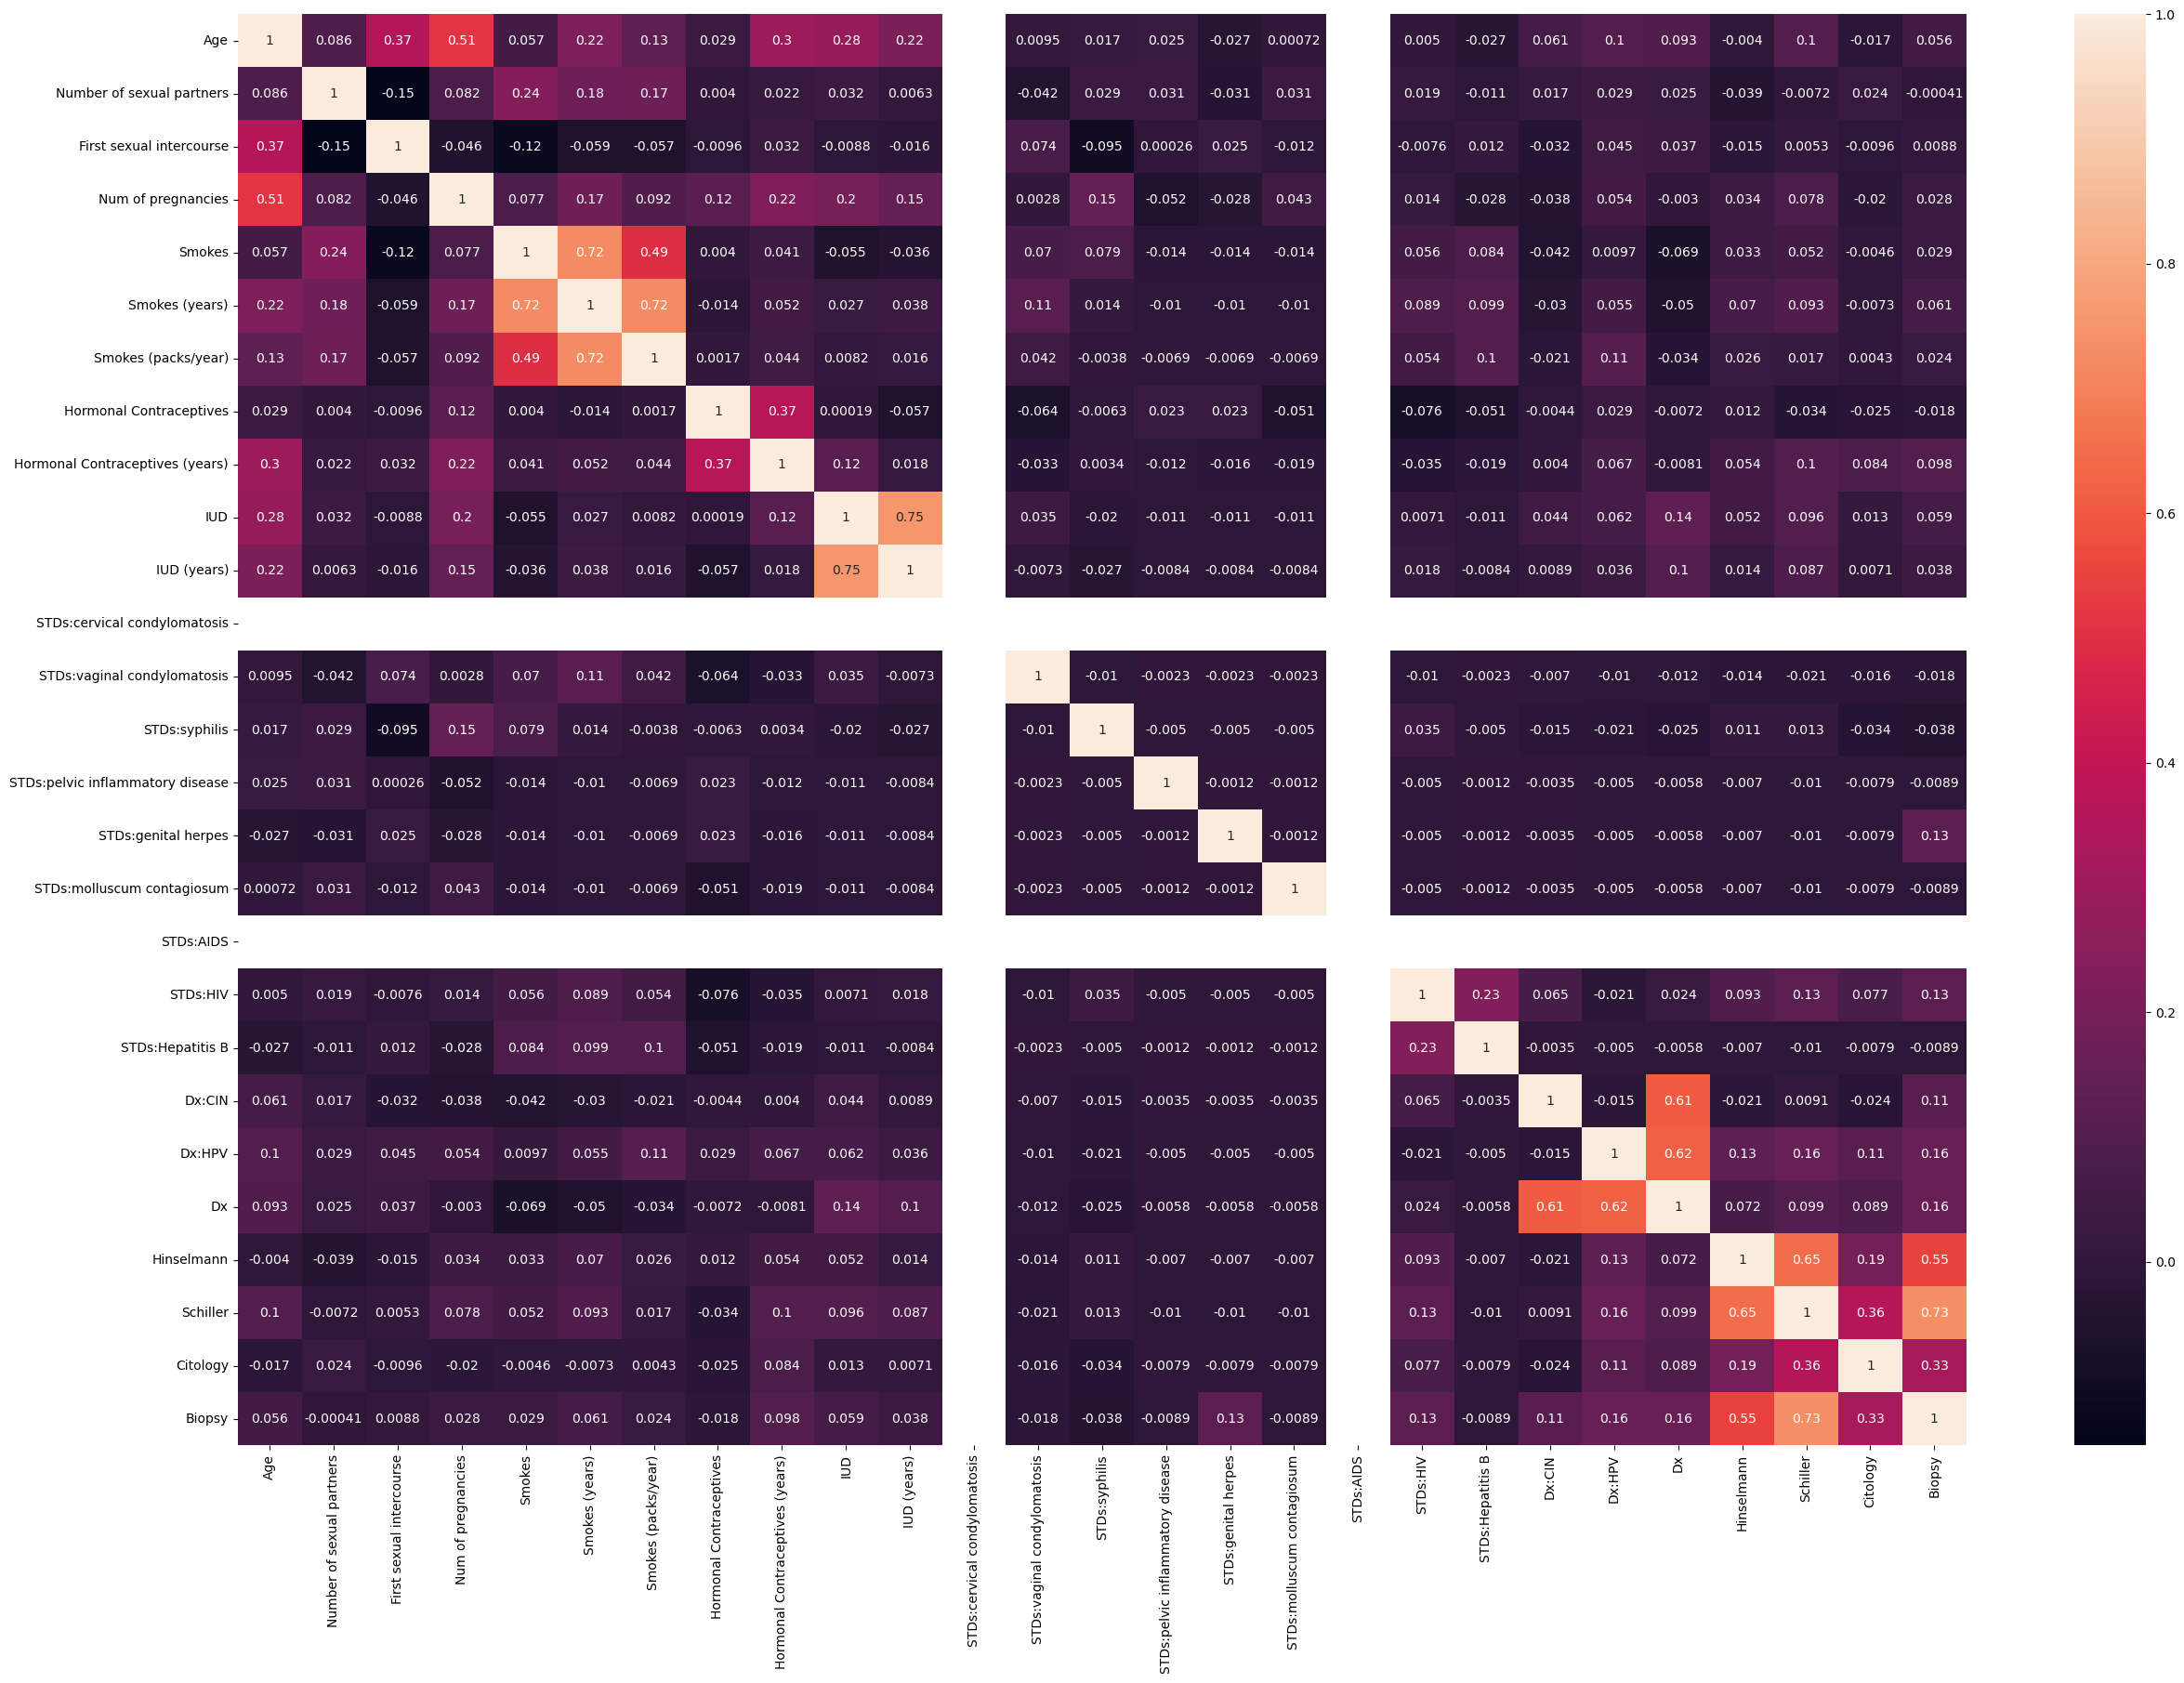

In [68]:
plt.figure(figsize=(30,20))
sns.heatmap(df1.corr(),annot= True)

In [67]:
df1.drop(columns= ['STDs:condylomatosis','STDs:vulvo-perineal condylomatosis','STDs:condylomatosis'],inplace  = True)

In [69]:
df1.shape

(858, 27)

In [16]:
df1= df.copy()

In [17]:
X = df1.drop('Biopsy',axis =1)
y = df1['Biopsy']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter= 1000)


In [ ]:
log_reg.fit(X_train_scaled,y_train)

In [92]:
log_reg_pred = log_reg.predict(X_test_scaled)
print(accuracy_score(y_test,log_reg_pred))

0.9577464788732394


In [90]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
clf_pred = log_reg.predict(X_test)
print(accuracy_score(y_test,clf_pred))

0.9577464788732394


In [24]:
# Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_scaled,y_train)
svc_pred = svc.predict(X_test_scaled)
print(accuracy_score(y_test,svc_pred))

In [10]:
final_pred = []
def voting(models, X_test):
    for i in X_test.index:
        ones=0
        zeroes = 0
        input1 = X_test[X_test.index == i].values
        for mod in models:
            out = mod.predict(input1)
            if out == 0:
                zeroes = zeroes+1
            else:
                ones = ones +1
        if(ones > zeroes):
            final_pred.append(1)
        else:
            final_pred.append(0)
    return final_pred
    
    

In [ ]:
voting_out = voting([svc,log_reg,knn,naive],X_test)

In [151]:
len(voting_out)

284

In [135]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape,df1.shape

((574, 26), (574,), (284, 26), (284,), (858, 27))

In [152]:
print(accuracy_score(y_test,voting_out))

0.9366197183098591


In [123]:
X_test[X_test.index == 713].values.shape

(1, 26)

In [121]:
X_test

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
713,16.0,1.0,16.0,1.0,0.0,0.0,0.000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
604,23.0,3.0,17.0,2.0,0.0,0.0,0.000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120,33.0,1.0,16.0,4.0,0.0,0.0,0.000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
208,27.0,4.0,16.0,1.0,0.0,0.0,0.000,1.0,0.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
380,18.0,3.0,15.0,1.0,1.0,2.0,0.003,1.0,0.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,18.0,2.0,15.0,2.0,1.0,0.5,0.050,1.0,0.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
764,23.0,1.0,15.0,3.0,0.0,0.0,0.000,1.0,0.25,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
477,38.0,2.0,19.0,2.0,0.0,0.0,0.000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,37.0,2.0,18.0,1.0,0.0,0.0,0.000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [106]:
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0


In [113]:
df[df.index == 9].values

array([[44, '3.0', '15.0', nan, '1.0', '1.266972909', '2.8', '0.0',
        '0.0', nan, nan, '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
        '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', 0, 0, 0, 0, 0,
        0, 0, 0, 0]], dtype=object)

In [157]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)
knn_pred = knn.predict(X_test_scaled)
print(accuracy_score(y_test,knn_pred))
# with scaled accurecy 0.9436619718309859

0.9401408450704225


In [158]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive.fit(X_train,y_train)
naive_pred = naive.predict(X_test_scaled)
print(accuracy_score(y_test,naive_pred))


0.9366197183098591


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [ ]:
# voting_out = voting([svc,log_reg,knn,naive],X_test)

In [161]:
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier()

In [175]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
eclf1 = VotingClassifier(estimators=[('svc', svc), ('log_reg', log_reg), ('knn', knn),('naive', naive),('random', rand_clf)], voting='hard')

In [176]:
eclf1 = eclf1.fit(X_train_scaled, y_train)

In [177]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [178]:
voting_pred = eclf1.predict(X_test_scaled)

In [179]:
print(accuracy_score(y_test,voting_pred))


0.9577464788732394


In [ ]:
import pickle
pickle.dump("model.pkl",open(log))